In [24]:
import nltk
nltk.download('vader_lexicon')
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/christineibaraki/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
sid = SentimentIntensityAnalyzer()

In [3]:
# data = pd.read_pickle("../../../sampled_processed_extant_posts.pkl")
data = pd.read_pickle("../../../all_clean_str_extant_posts.pkl")

In [4]:
print(f"rows in data: {len(data)}")

rows in data: 8983413


In [5]:
data = data.sample(frac=0.5)
print(f"rows in data: {len(data)}")
data.head()

rows in data: 4491706


,orig_selftext,text_clean_space,text_clean_punc_lower,len_clean
2803795,This man is a racist.,This man is a racist.,this man is a racist,20
6101235,That was The Whole shebang right there. He is ...,That was The Whole shebang right there. He is ...,that was the whole shebang right there he is t...,102
8421684,"Tried it on my phone, no dice :(","Tried it on my phone, no dice :(",tried it on my phone no dice,29
1898609,"Yes, electric fence stuff. Get a small one. An...","Yes, electric fence stuff. Get a small one. An...",yes electric fence stuff get a small one and y...,130
5766103,Who cares there's another 45 kids at home,Who cares there's another 45 kids at home,who cares theres another 45 kids at home,40


In [6]:
def parse_vader_scores(post):
    score_dict = sid.polarity_scores(post)
    return score_dict, score_dict['neg'], score_dict['neu'], score_dict['pos'], score_dict['compound']

In [7]:
processed_scores_columns = data.apply(
    lambda row: parse_vader_scores(row['text_clean_space']), axis='columns', result_type='expand')

In [8]:
processed_scores_columns.columns = ['vader_scores', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']

In [9]:
processed_scores_columns.head()

,vader_scores,vader_neg,vader_neu,vader_pos,vader_compound
2803795,"{'neg': 0.571, 'neu': 0.429, 'pos': 0.0, 'comp...",0.571,0.429,0.000,-0.6124
6101235,"{'neg': 0.139, 'neu': 0.861, 'pos': 0.0, 'comp...",0.139,0.861,0.000,-0.4404
8421684,"{'neg': 0.459, 'neu': 0.541, 'pos': 0.0, 'comp...",0.459,0.541,0.000,-0.6249
1898609,"{'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'comp...",0.000,0.903,0.097,0.4019
5766103,"{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound...",0.000,0.700,0.300,0.4588


In [10]:
data = pd.concat([data, processed_scores_columns],
                         axis='columns')

In [11]:
for index, row in data.sample(n=10).iterrows():
    print(row['text_clean_space'])
    print(row['vader_scores'])

Preach...she would have been a trainwreck for our state.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
#**100%**
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Eww
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
**[Content Policy](https://www.redditinc.com/policies/content-policy) Reminder**: Content that "encourages, glorifies, incites, or calls for [violence](https://www.reddithelp.com/en/categories/rules-reporting/account-and-community-restrictions/do-not-post-violent-content)", or that shares someone's [personal information](https://www.reddithelp.com/en/categories/rules-reporting/account-and-community-restrictions/posting-someones-private-or-personal) is not permitted on The_Donald. Violations may result in T_D or sitewide ban. **If you see potentially rule breaking content, immediately downvote &amp; report.** --- *I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/The_Donald) if 

In [12]:
data.head()

,orig_selftext,text_clean_space,text_clean_punc_lower,len_clean,vader_scores,vader_neg,vader_neu,vader_pos,vader_compound
2803795,This man is a racist.,This man is a racist.,this man is a racist,20,"{'neg': 0.571, 'neu': 0.429, 'pos': 0.0, 'comp...",0.571,0.429,0.000,-0.6124
6101235,That was The Whole shebang right there. He is ...,That was The Whole shebang right there. He is ...,that was the whole shebang right there he is t...,102,"{'neg': 0.139, 'neu': 0.861, 'pos': 0.0, 'comp...",0.139,0.861,0.000,-0.4404
8421684,"Tried it on my phone, no dice :(","Tried it on my phone, no dice :(",tried it on my phone no dice,29,"{'neg': 0.459, 'neu': 0.541, 'pos': 0.0, 'comp...",0.459,0.541,0.000,-0.6249
1898609,"Yes, electric fence stuff. Get a small one. An...","Yes, electric fence stuff. Get a small one. An...",yes electric fence stuff get a small one and y...,130,"{'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'comp...",0.000,0.903,0.097,0.4019
5766103,Who cares there's another 45 kids at home,Who cares there's another 45 kids at home,who cares theres another 45 kids at home,40,"{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound...",0.000,0.700,0.300,0.4588


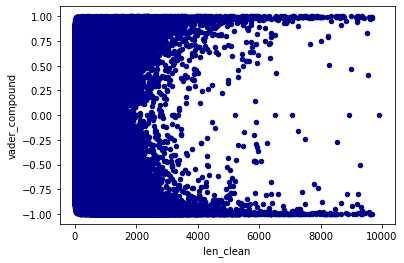

In [13]:
ax1 = data.plot.scatter(x='len_clean',
                      y='vader_compound',
                      c='DarkBlue')

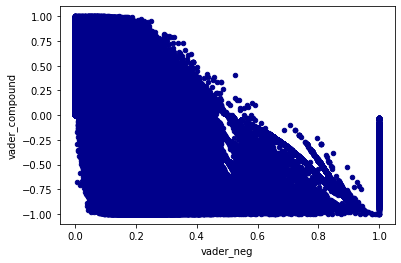

In [14]:
ax1 = data.plot.scatter(x='vader_neg',
                      y='vader_compound',
                      c='DarkBlue')

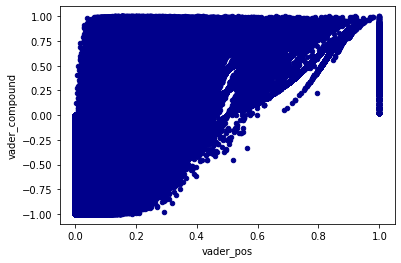

In [15]:
ax1 = data.plot.scatter(x='vader_pos',
                      y='vader_compound',
                      c='DarkBlue')

array([[<AxesSubplot:title={'center':'vader_compound'}>]], dtype=object)

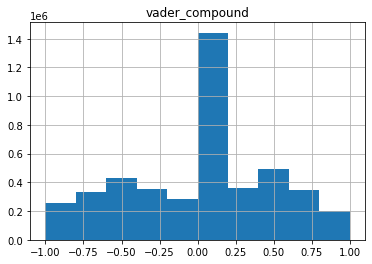

In [16]:
data.hist(column="vader_compound")

In [17]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

posts_pkl_path = os.path.join('..', '..', '..', "combined_bigquery_processed.pkl")
posts_df = pd.read_pickle(posts_pkl_path)

In [18]:
data.shape

(4491706, 9)

In [19]:
data = data.merge(posts_df, left_index = True, right_index = True, how = 'left')

In [20]:
data.shape

(4491706, 31)

In [21]:
data.head()

,orig_selftext,text_clean_space,text_clean_punc_lower,len_clean,vader_scores,vader_neg,vader_neu,vader_pos,vader_compound,selftext,...,retrieved_on,controversiality,gilded,id,subreddit,ups,distinguished,author_flair_css_class,created_date,post_type
2803795,This man is a racist.,This man is a racist.,this man is a racist,20,"{'neg': 0.571, 'neu': 0.429, 'pos': 0.0, 'comp...",0.571,0.429,0.000,-0.6124,This man is a racist.,...,1572177698,0,0,etxnbw2,The_Donald,NaN,NaN,NaN,2019-07-16,extant
6101235,That was The Whole shebang right there. He is ...,That was The Whole shebang right there. He is ...,that was the whole shebang right there he is t...,102,"{'neg': 0.139, 'neu': 0.861, 'pos': 0.0, 'comp...",0.139,0.861,0.000,-0.4404,That was The Whole shebang right there. He is ...,...,1555974186,0,0,eifqt0v,The_Donald,NaN,NaN,new-york,2019-03-13,extant
8421684,"Tried it on my phone, no dice :(","Tried it on my phone, no dice :(",tried it on my phone no dice,29,"{'neg': 0.459, 'neu': 0.541, 'pos': 0.0, 'comp...",0.459,0.541,0.000,-0.6249,"Tried it on my phone, no dice :(",...,1574105641,0,0,ewtqab4,The_Donald,NaN,NaN,MURICA,2019-08-13,extant
1898609,"Yes, electric fence stuff. Get a small one. An...","Yes, electric fence stuff. Get a small one. An...",yes electric fence stuff get a small one and y...,130,"{'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'comp...",0.000,0.903,0.097,0.4019,"Yes, electric fence stuff. Get a small one. An...",...,1586201792,0,0,fcaloof,The_Donald,NaN,NaN,NaN,2019-12-28,extant
5766103,Who cares there's another 45 kids at home,Who cares there's another 45 kids at home,who cares theres another 45 kids at home,40,"{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound...",0.000,0.700,0.300,0.4588,Who cares there's another 45 kids at home,...,1559013748,0,0,ell72gu,The_Donald,NaN,NaN,NaN,2019-04-23,extant


In [27]:
def plot_seven_day_moving_avg(df, col, title, y_axis, counts=False):
    
    if counts:
        compound_date = df.groupby(['created_date'])[col].size().reset_index()
        compound_date.set_index('created_date', inplace=True)
    else:
        compound_date = df.groupby(['created_date'])[col].mean().reset_index()
        compound_date.set_index('created_date', inplace=True)
    
    MOVING_AVG_WINDOW = 7
    compound_date['7_day_avg'] = (compound_date[col].
            rolling(window=MOVING_AVG_WINDOW).mean())
    
    plt.figure(figsize=(20,6))
    compound_date['7_day_avg'].plot(linewidth=0.5)
    plt.ylabel(y_axis, size=15)
    plt.xlabel("Date", size=15)
    plt.title(title, size=18)

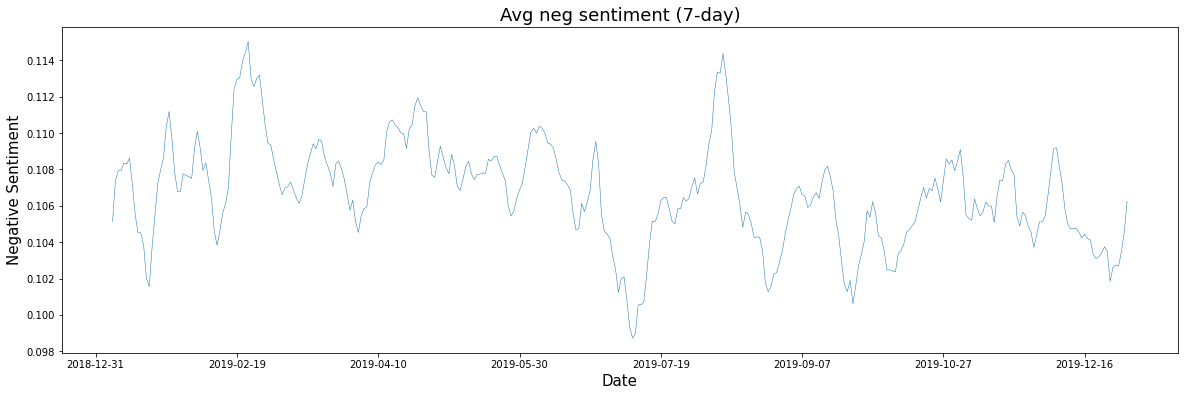

In [28]:
plot_seven_day_moving_avg(data, 'vader_neg', 'Avg neg sentiment (7-day)', 'Negative Sentiment')

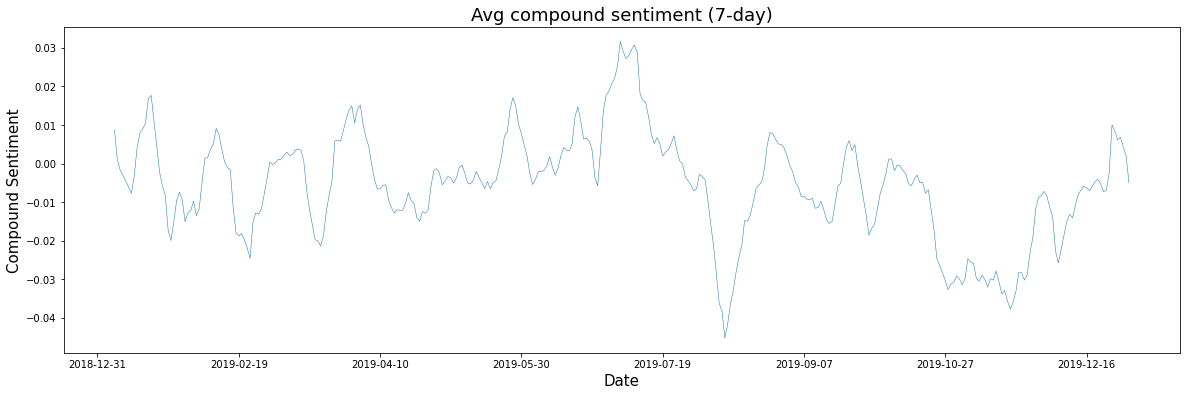

In [29]:
plot_seven_day_moving_avg(data, 'vader_compound', 'Avg compound sentiment (7-day)', 'Compound Sentiment')

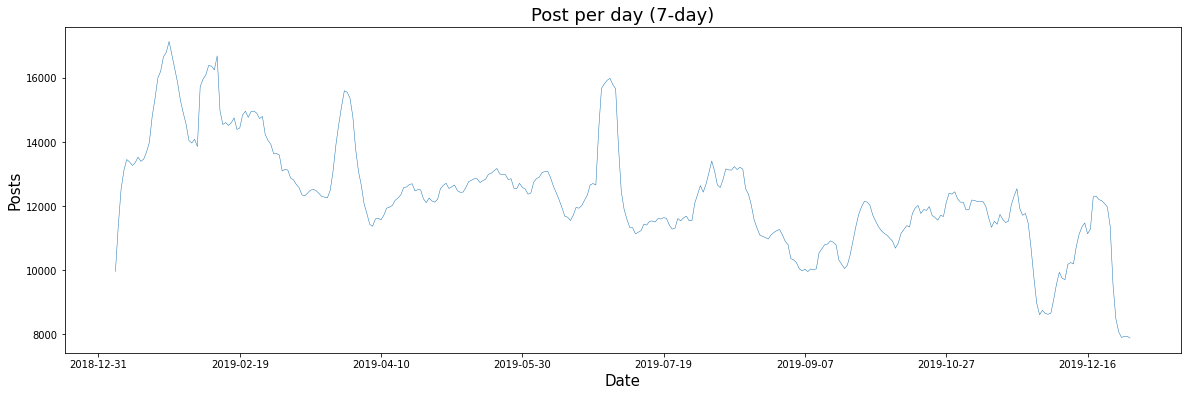

In [32]:
plot_seven_day_moving_avg(data, 'vader_compound', 'Post per day (7-day)', 'Posts', True)